In [1]:
# Shivpure, Sameer
# 1001-417-543
# 2017-02-20
# Assignment_02_01

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from ipywidgets import interact, fixed, IntSlider,IntRangeSlider, Label
from IPython.display import display
import cv2 as cv

## Hough lines function

In [9]:
def my_HoughLines(input_image,rho_resolution,theta_resolution,threshold):
    
    hlines = []
    max_rho = np.ceil(np.hypot(input_image.shape[0], input_image.shape[1]))
    drho = max_rho/rho_resolution
    dtheta = 180/theta_resolution
    r = np.linspace(-max_rho,max_rho,rho_resolution)
    
    accumalator = np.zeros((rho_resolution, theta_resolution))
    theta = np.linspace(-90,90,theta_resolution)
    
    edge_image  = cv.Canny(input_image,100,150,apertureSize =3)
    cos_th = np.cos(np.deg2rad(theta))
    sin_th = np.sin(np.deg2rad(theta))
    
    for y_index, row in enumerate(edge_image):
        for x_index, edge in enumerate(row):
                if(edge):
                    rho = x_index*cos_th + y_index*sin_th
                    rho = (rho / drho )
                    accumalator[np.floor(rho).astype(int),np.round(theta/ dtheta).astype(int)-1] += 1
                    
    
    for rho_index, accu_row in enumerate(accumalator):
        for theta_index, accu_value in enumerate(accu_row):
            if accu_value >=threshold:
                #hlines.append([rho_index*drho,theta_index*dtheta])
                hlines.append([r[rho_index]+rho_resolution/2,theta[theta_index]*dtheta])
                
    return np.array(hlines)

## Task 1

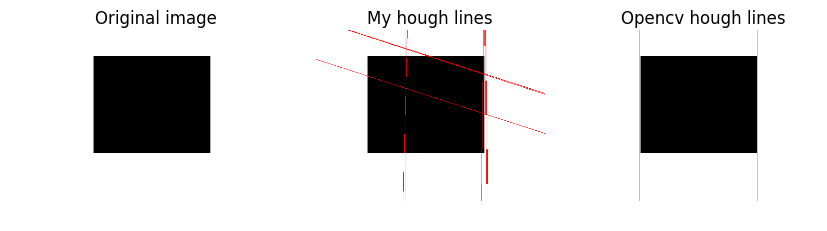

In [10]:
def houghLines_detector(input_image,rho_resolution,theta_resolution,threshold):
    gray_input_image  = cv.cvtColor( input_image, cv.COLOR_RGB2GRAY )
    output_image = input_image.copy()
    cvoutput_image =  input_image.copy()
    max_size=max(input_image.shape[0], input_image.shape[1])**2 
    lines = my_HoughLines(gray_input_image,rho_resolution,theta_resolution,threshold)
    for rho_theta in lines:
        rho=rho_theta[0]
        theta=rho_theta[1]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + max_size*(-b))
        y1 = int(y0 + max_size*(a))
        x2 = int(x0 - max_size*(-b))
        y2 = int(y0 - max_size*(a))
        cv.line(output_image,(x1,y1),(x2,y2),(255,0,0),1)
    
    edges = cv.Canny(gray_input_image,100,150,apertureSize =3)
    cvlines = cv.HoughLines(edges,np.hypot(input_image.shape[0], input_image.shape[1])/rho_resolution,360/theta_resolution,threshold)
    
    for rho_theta in cvlines:
        rho=rho_theta[0][0]
        theta=rho_theta[0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + max_size*(-b))
        y1 = int(y0 + max_size*(a))
        x2 = int(x0 - max_size*(-b))
        y2 = int(y0 - max_size*(a))
        cv.line(cvoutput_image,(x1,y1),(x2,y2),(255,0,0),1)
    fig1, ax1 = plt.subplots(1,3)
    fig1.set_size_inches(10,5)
    ax1[0].imshow(input_image)
    ax1[0].axis('off')
    ax1[0].set(title='Original image')
    ax1[1].imshow(output_image)
    ax1[1].axis('off')
    ax1[1].set(title='My hough lines')
    ax1[2].imshow(cvoutput_image)
    ax1[2].axis('off')
    ax1[2].set(title='Opencv hough lines')
    plt.show()

original_image = cv.imread('test01.png')

interact(houghLines_detector, input_image= fixed(original_image), rho_resolution=IntSlider(min=10, max=1000, value=100, continuous_update=False),\
                      theta_resolution=IntSlider(min=10, max=1000, value=360, continuous_update=False),\
                      threshold=IntSlider(min=5, max=1000, value=20, continuous_update=False));

## Hough circles function

In [5]:
def my_HoughCircles(input_image, resolution, threshold, min_radius, max_radius):
    
    hpoints = []
    max_rho = np.ceil(np.hypot(input_image.shape[0], input_image.shape[1]))
    drho = max_rho/resolution
    accumalator = np.zeros((resolution, resolution, resolution))
    theta = np.linspace(0,359,resolution)
    rad = np.linspace(min_radius, max_radius, resolution)
    
    edge_image  = cv.Canny(input_image,50,150,apertureSize =3)
    cos_th = np.cos(np.deg2rad(theta))
    sin_th = np.sin(np.deg2rad(theta))
    
    for y_index, row in enumerate(edge_image):
        for x_index, edge in enumerate(row):
                if(edge):
                    center_x = (x_index - rad*cos_th)/drho
                    center_y = (y_index - rad*sin_th)/drho
                    accumalator[np.floor(center_x).astype(int),np.floor(center_y).astype(int), np.ceil(rad/drho).astype(int)] += 1
                        
    for ax_index, accu_x in enumerate(accumalator):
        for ay_index, accu_y in enumerate(accu_x):
            for ar_index, accu_value in enumerate(accu_y):
                if accu_value >=threshold:
                    hpoints.append([ax_index*drho,ay_index*drho, ar_index*drho])
    
    return np.array(hpoints)

## Task 2

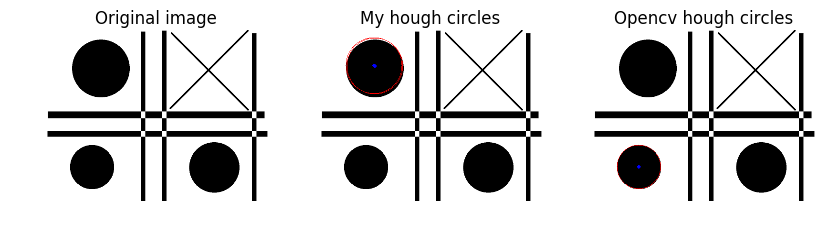

In [6]:
def houghCircles_detector(input_image,resolution,threshold,radius):
    gray_input_image  = cv.cvtColor( input_image, cv.COLOR_RGB2GRAY )
    output_image = input_image.copy()
    cvoutput_image =  input_image.copy()
    max_size=max(input_image.shape[0], input_image.shape[1])**2 
    circles = my_HoughCircles(gray_input_image,resolution, threshold, radius[0], radius[1])
    circles = np.uint16(np.around(circles))
    for i in circles:
        cv.circle(output_image,(i[0],i[1]),i[2],(255,0,0),1)
        cv.circle(output_image,(i[0],i[1]),2,(0,0,255),3)
    
    hcircles = cv.HoughCircles(gray_input_image,cv.HOUGH_GRADIENT,1,threshold,param1=150,param2=50,minRadius=radius[0],maxRadius=radius[1])
    hcircles = np.uint16(np.around(hcircles))
    for i in hcircles[0,:]:
        cv.circle(cvoutput_image,(i[0],i[1]),i[2],(255,0,0),1)
        cv.circle(cvoutput_image,(i[0],i[1]),2,(0,0,255),3)
    fig2, ax2 = plt.subplots(1,3)
    fig2.set_size_inches(10,7)
    ax2[0].imshow(input_image)
    ax2[0].axis('off')
    ax2[0].set(title='Original image')
    ax2[1].imshow(output_image)
    ax2[1].axis('off')
    ax2[1].set(title='My hough circles')
    ax2[2].imshow(cvoutput_image)
    ax2[2].axis('off')
    ax2[2].set(title='Opencv hough circles')
    plt.show()


original_image = cv.imread('testImage.png')

interact(houghCircles_detector, input_image= fixed(original_image), resolution=IntSlider(min=10, max=1000, value=100, continuous_update=False),\
         threshold=IntSlider(min=5, max=1000, value=20, continuous_update=False), \
         radius=IntRangeSlider(min=5, max=100, value=[20,50], continuous_update=False));